<a href="https://colab.research.google.com/github/fasthill/ML-DL-study-alone/blob/main/5-1%20%EA%B2%B0%EC%A0%95%20%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결정 트리 <br>
트리 모델 하나로는 좋은 성능을 도출하기는 제한이 있으나, 앙상블로 같이 여러개를 사용하면 앙상블 모델이 너무 좋은 성능을 나타낼 수 있어서 각광을 받고 있음.

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/5-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 로지스틱 회귀로 와인 분류하기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
wine.describe(include='all')

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [5]:
train = wine.iloc[:, 0:-1].to_numpy()
target = wine.iloc[:, -1].values

In [6]:
train_input, test_input, train_target, test_target = train_test_split(train, target, test_size=0.2, random_state=42)

In [7]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


### 결정 트리는 스케일을 조정할 필요가 없음 <br>
선형함수를 훈련하는 알고리즘이 아니기 때문에 가중치를 계산하지 않고 진행해도 됨.

In [8]:
ss = StandardScaler()
ss.fit(train_input)

StandardScaler()

In [9]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [10]:
lr = LogisticRegression()
lr.fit(train_scaled, train_target)

LogisticRegression()

In [11]:
train_score = lr.score(train_scaled, train_target)
test_score = lr.score(test_scaled, test_target)
print('train score: {} \n test score: {}'.format(train_score, test_score))

train score: 0.7808350971714451 
 test score: 0.7776923076923077


### 설명하기 쉬운 모델과 어려운 모델

In [12]:
lr.coef_, lr.intercept_

(array([[ 0.51270274,  1.6733911 , -0.68767781]]), array([1.81777902]))

## 결정 트리 <br>
트리를 구분하는 기준은 gini 계수로 하고 있음

In [13]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(random_state=42)

In [14]:
train_score = dt.score(train_scaled, train_target)
test_score = dt.score(test_scaled, test_target)
print('train score: {} \n test score: {}'.format(train_score, test_score))

train score: 0.996921300750433 
 test score: 0.8592307692307692


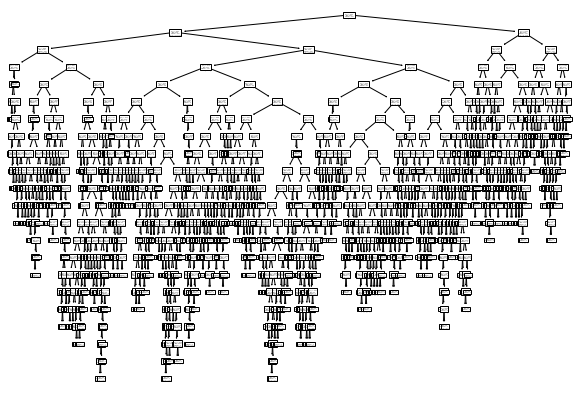

In [15]:
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show() # colab, notebook에서는 plt.show없이도 가능하나 그림 그리기 전의 데이터 print를 보이지 않게 함.

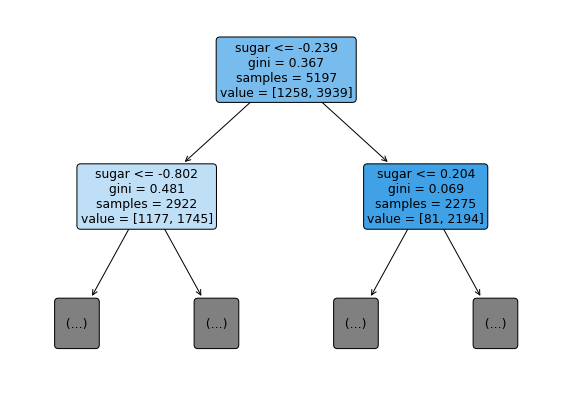

In [16]:
classes = wine.columns[:3]
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, rounded=True, feature_names=classes)
plt.show()

In [17]:
classes = wine.columns[:3]
classes

Index(['alcohol', 'sugar', 'pH'], dtype='object')

### 가지치기 <br>
대표적인 과대적합 방지 방법 in  결정트리 방법 <br>
가중치를 학습하는 방법이 아니기 때문에 L1, L2 규제 등을 적용할 수 없음.

In [18]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [19]:
train_score = dt.score(train_scaled, train_target)
test_score = dt.score(test_scaled, test_target)
print('train score: {} \n test score: {}'.format(train_score, test_score))

train score: 0.8454877814123533 
 test score: 0.8415384615384616


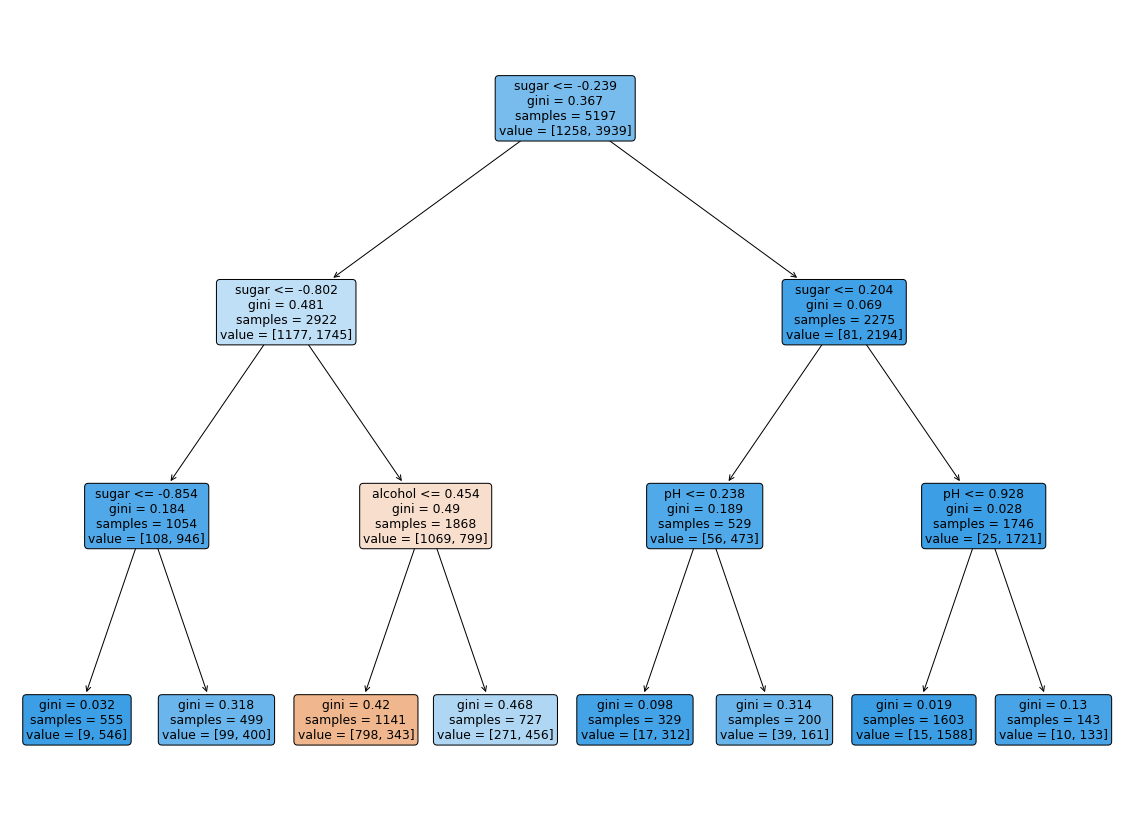

In [20]:
classes = wine.columns[:3]
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, rounded=True, feature_names=classes)
plt.show()

위 그림에서 설탕 당도가 음수로 표시된 이유는 표준화 과정을 거쳤기 때문에 나타나는 현상으로 표준화 과정을 거치지 않으면 더 설명하기가 좋을 것임.

## 전처리 없이 수행

In [21]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [22]:
train_score = dt.score(train_input, train_target)
test_score = dt.score(test_input, test_target)
print('train score: {} \n test score: {}'.format(train_score, test_score))

train score: 0.8454877814123533 
 test score: 0.8415384615384616


표준화한 후의 결과와 동일함.

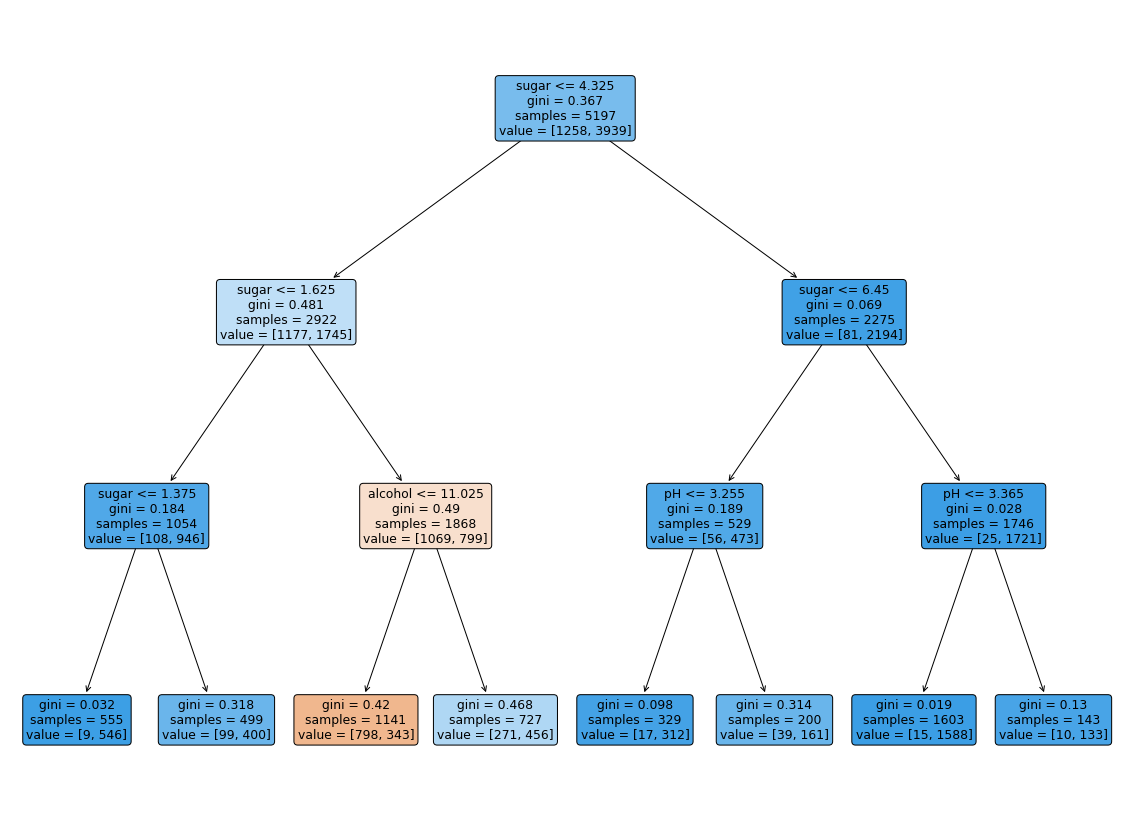

In [23]:
classes = wine.columns[:3]
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, rounded=True, feature_names=classes)
plt.show()

설탕 농도 표시에서 음수가 보이지 않음.

In [24]:
print(dt.feature_importances_) # 두번째 설탕이 중요도가 가장 높음. 트리 기반의 모델에서 제공함.

[0.12345626 0.86862934 0.0079144 ]


## 확인문제

In [25]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8874350586877044
0.8615384615384616


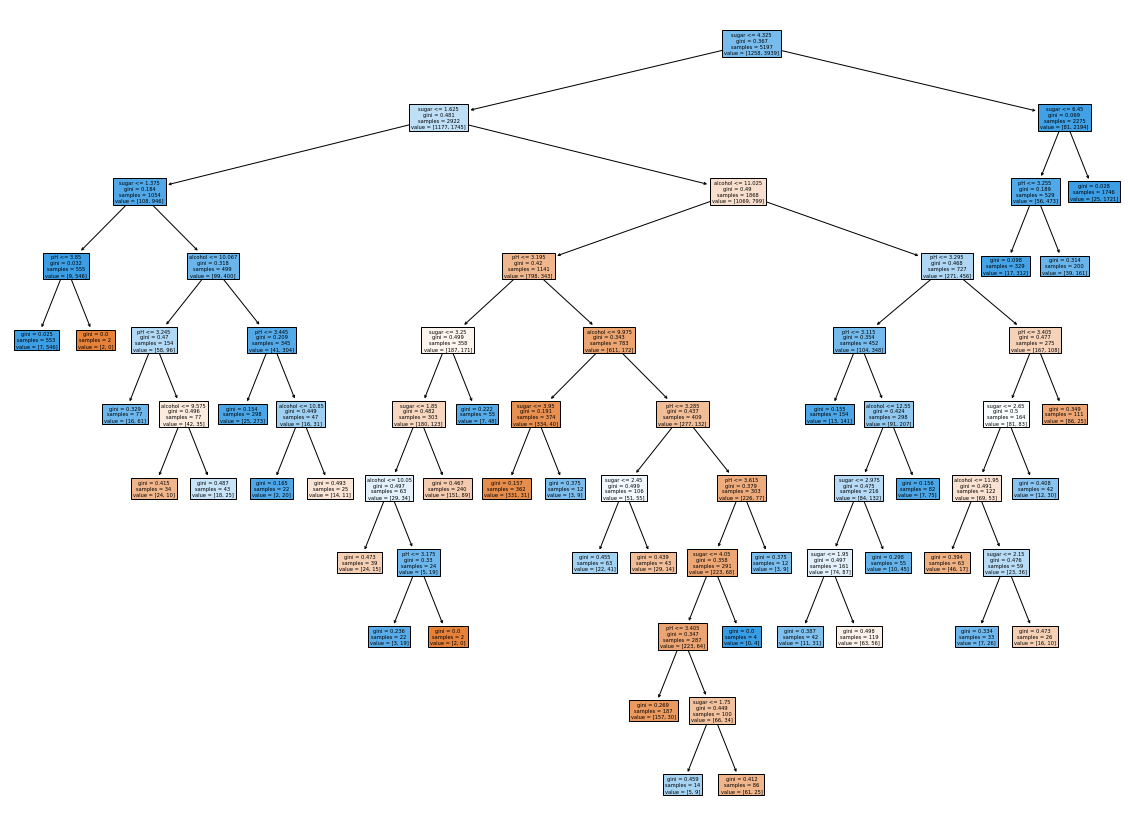

In [26]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()